In [3]:
import pandas as pd 

df = pd.read_csv("response_time_.csv")
df.head(8)

,Date,Response Time
0,06/08/2020 07:39:02,0:00:06
1,06/08/2020 07:39:04,0:00:01
2,06/08/2020 07:39:08,0:00:02
3,06/08/2020 07:39:11,0:00:01
4,06/08/2020 07:39:19,0:00:01
5,06/08/2020 07:39:21,0:00:02
6,06/08/2020 07:39:29,0:00:01
7,06/08/2020 07:39:58,0:00:26


In [41]:
df['Date']=pd.to_datetime(df['Date'],format="%d/%m/%Y %H:%M:%S")
df['Response Time']=pd.to_datetime(df['Response Time'],format="%H:%M:%S")
df_trans=df.copy()
df_trans['Date']=df_trans['Date'].dt.date
df_trans['Response Time']=df_trans['Response Time'].dt.time

list_sec=[]
for item in df_trans['Response Time']:
    list_sec.append((3600*item.hour)+(60*item.minute)+item.second)


df_trans['Response Time']=list_sec

max(df_trans['Response Time'])

66

In [44]:
groups=df_trans.groupby('Date')

import seaborn as sns
import matplotlib.pyplot as plt 

groups.describe()

Response Time                                                
                   count      mean       std  min   25%  50%   75%   max
Date                                                                    
2020-08-06         124.0  3.709677  7.361484  0.0  1.00  2.0  3.00  55.0
2020-08-07          29.0  2.965517  3.041179  0.0  1.00  2.0  3.00  14.0
2020-08-08         126.0  3.007937  6.556214  0.0  1.00  2.0  3.00  66.0
2020-08-09         241.0  2.991701  3.496417  0.0  1.00  2.0  3.00  15.0
2020-08-10          32.0  2.625000  3.024097  0.0  1.00  2.0  3.00  14.0
2020-08-11         108.0  3.166667  3.662133  0.0  1.00  2.0  4.00  15.0
2020-08-12         119.0  2.705882  3.187244  0.0  1.00  2.0  3.00  18.0
2020-08-13          48.0  3.729167  4.602218  0.0  1.00  2.0  3.00  15.0
2020-08-14          40.0  2.750000  3.310821  0.0  1.00  2.0  3.25  15.0
2020-08-15          36.0  3.527778  3.960419  0.0  1.75  3.0  4.00  14.0
2020-08-16          39.0  2.743590  3.015032  0.0  1.00  2.0  3.00  15.0
2020-08-17          94.0  2.521277  4.012691  0.0  1.00  2.0  3.00  37.0

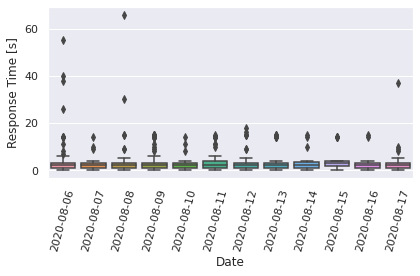

In [71]:
sns.set()
g=sns.boxplot(x='Date',y='Response Time',data=df_trans)
g.set_xticklabels(g.get_xticklabels(),rotation=75)
plt.ylabel('Response Time [s]')
plt.tight_layout()
plt.savefig('test1.pdf')

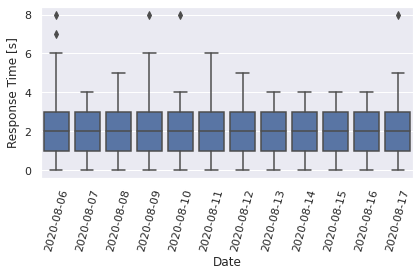

In [72]:
Q1 = df_trans['Response Time'].quantile(0.15)
Q3 = df_trans['Response Time'].quantile(0.85)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df_trans['Response Time'] >= Q1 - 1.5 * IQR) & (df_trans['Response Time'] <= Q3 + 1.5 *IQR)
df_filter=df_trans.loc[filter]  
g=sns.boxplot(x='Date',y='Response Time',data=df_filter,color='b')
g.set_xticklabels(g.get_xticklabels(),rotation=75)
plt.ylabel('Response Time [s]')

plt.tight_layout()
plt.savefig('test2.pdf')

In [58]:
a=sns.boxplot(x=groups.Date)

AttributeError: 'bool' object has no attribute 'all'

In [6]:
groups.boxplot(by='Date', column='Value')

KeyError: 'Column not found: Value'